<a href="https://colab.research.google.com/github/Abi-Lowkey/MachineLearningTasks/blob/main/6thWeekTasks/Clustering_model_on_clusteringweek06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Ketut Satria Wibisana**

**NIM : 1103213148**

**Lecture Week 6 : Clustering model**


**Dataset : clusteringweek06.csv**

**Dokumentasi Chat GPT :** [Link ](https://chatgpt.com/share/672e1099-2de0-8001-b5cf-1d5e1a70deb0)

**Prompt: Beri kode untuk connect gcolab dengan gdrive!**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## **#Import Library**

In [17]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


**Prompt: Beri kode untuk read dataset sebagai dataframe!**

In [6]:
# Misal file ada di dalam folder `My Drive`
df = pd.read_csv('/content/drive/MyDrive/Dataset/clusteringweek06.csv')

# Menampilkan 5 baris pertama
df.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


In [9]:
# Menampilkan informasi dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   float64
 19  x20     7195 non-null   float64
 20  x21     7195 non-null   float64
 21  x22     7195 non-null   float64
dtype

In [7]:
df.tail(5) #menampilkan 5 baris terakhir dari DataFrame

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895
7194,1.0,-0.508833,-0.324106,0.062068,0.078211,0.397188,0.094596,-0.117672,0.058874,0.076180,...,-0.150554,-0.073415,0.042517,0.004158,0.061455,0.072983,-0.003980,0.031560,-0.029355,-0.087910


**Prompt: Aku punya dataset berikut: clusteringweek06.csv
Dan informasi terkait dataframe saya sebagai berikut:**
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   float64
 19  x20     7195 non-null   float64
 20  x21     7195 non-null   float64
 21  x22     7195 non-null   float64
dtypes: float64(22)

**dan data.head sebagai berikut:**
x1	x2	x3	x4	x5	x6	x7	x8	x9	x10	...	x13	x14	x15	x16	x17	x18	x19	x20	x21	x22
0	1.0	0.152936	-0.105586	0.200722	0.317201	0.260764	0.100945	-0.150063	-0.171128	0.124676	...	-0.156436	0.082245	0.135752	-0.024017	-0.108351	-0.077623	-0.009568	0.057684	0.118680	0.014038
1	1.0	0.171534	-0.098975	0.268425	0.338672	0.268353	0.060835	-0.222475	-0.207693	0.170883	...	-0.254341	0.022786	0.163320	0.012022	-0.090974	-0.056510	-0.035303	0.020140	0.082263	0.029056
2	1.0	0.152317	-0.082973	0.287128	0.276014	0.189867	0.008714	-0.242234	-0.219153	0.232538	...	-0.237384	0.050791	0.207338	0.083536	-0.050691	-0.023590	-0.066722	-0.025083	0.099108	0.077162
3	1.0	0.224392	0.118985	0.329432	0.372088	0.361005	0.015501	-0.194347	-0.098181	0.270375	...	-0.317084	-0.011567	0.100413	-0.050224	-0.136009	-0.177037	-0.130498	-0.054766	-0.018691	0.023954
4	1.0	0.087817	-0.068345	0.306967	0.330923	0.249144	0.006884	-0.265423	-0.172700	0.266434	...	-0.298524	0.037439	0.219153	0.062837	-0.048885	-0.053074	-0.088550	-0.031346	0.108610	0.079244
5 rows × 22 columns
'beri kode untuk membuat Pipeline tiga model clustering

## **#Membaca Dataset**

In [22]:
# Mengambil semua nilai dari DataFrame df dalam bentuk array numpy
# df.values akan menghilangkan informasi kolom dan indeks,
# sehingga hanya menyisakan nilai-nilai numerik dari DataFrame
X = df.values

# **#Definisikan Pipeline untuk Model Clustering**

In [23]:
# Pipeline untuk KMeans
# Membuat pipeline yang berisi dua langkah:
# 1. 'scaler': StandardScaler() - Menggunakan StandardScaler untuk menormalkan data agar memiliki distribusi dengan mean 0 dan standar deviasi 1.
# 2. 'kmeans': KMeans(n_clusters=3, random_state=42) - Menjalankan KMeans clustering dengan 3 cluster. random_state=42 digunakan agar hasilnya konsisten pada setiap run.
pipeline_kmeans = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Pipeline untuk Agglomerative Clustering
# Membuat pipeline yang berisi dua langkah:
# 1. 'scaler': StandardScaler() - Menormalkan data dengan distribusi mean 0 dan standar deviasi 1.
# 2. 'agg_clustering': AgglomerativeClustering(n_clusters=3) - Menjalankan Agglomerative Clustering dengan 3 cluster untuk data hierarki.
pipeline_agg = Pipeline([
    ('scaler', StandardScaler()),
    ('agg_clustering', AgglomerativeClustering(n_clusters=3))
])

# Pipeline untuk DBSCAN
# Membuat pipeline yang berisi dua langkah:
# 1. 'scaler': StandardScaler() - Menormalkan data agar memiliki mean 0 dan standar deviasi 1.
# 2. 'dbscan': DBSCAN(eps=0.5, min_samples=5) - Menjalankan DBSCAN clustering dengan parameter eps=0.5 (radius tetangga) dan min_samples=5 (jumlah minimum titik yang dibutuhkan untuk membentuk cluster).
pipeline_dbscan = Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.5, min_samples=5))
])



## **#Fit Data ke dalam Setiap Pipeline**

In [24]:
# Fit KMeans
# Melakukan fitting (pelatihan) pipeline KMeans pada data X
# pipeline_kmeans.named_steps['kmeans'] mengakses langkah KMeans dalam pipeline
# .labels_ adalah atribut yang menyimpan label cluster untuk setiap data setelah fitting
pipeline_kmeans.fit(X)
labels_kmeans = pipeline_kmeans.named_steps['kmeans'].labels_

# Fit Agglomerative Clustering
# Melakukan fitting (pelatihan) pipeline Agglomerative Clustering pada data X
# pipeline_agg.named_steps['agg_clustering'] mengakses langkah Agglomerative Clustering dalam pipeline
# .labels_ menyimpan label cluster untuk setiap data setelah fitting
pipeline_agg.fit(X)
labels_agg = pipeline_agg.named_steps['agg_clustering'].labels_

# Fit DBSCAN
# Melakukan fitting (pelatihan) pipeline DBSCAN pada data X
# pipeline_dbscan.named_steps['dbscan'] mengakses langkah DBSCAN dalam pipeline
# .labels_ menyimpan label cluster untuk setiap data setelah fitting
pipeline_dbscan.fit(X)
labels_dbscan = pipeline_dbscan.named_steps['dbscan'].labels_


## **#Hasil Clustering**

In [25]:
# Tambahkan label hasil clustering ke DataFrame
# Menambahkan kolom baru 'KMeans_Labels' ke df yang berisi label hasil clustering dari model KMeans
# Menambahkan kolom baru 'Agglomerative_Labels' ke df yang berisi label hasil clustering dari model Agglomerative Clustering
# Menambahkan kolom baru 'DBSCAN_Labels' ke df yang berisi label hasil clustering dari model DBSCAN
df['KMeans_Labels'] = labels_kmeans
df['Agglomerative_Labels'] = labels_agg
df['DBSCAN_Labels'] = labels_dbscan

# Tampilkan 5 data pertama beserta label clustering
# Menampilkan lima baris pertama dari DataFrame df, termasuk kolom label yang baru ditambahkan
print(df.head())



    x1        x2        x3        x4        x5        x6        x7        x8  \
0  1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1  1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2  1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3  1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4  1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   

         x9       x10  ...       x16       x17       x18       x19       x20  \
0 -0.171128  0.124676  ... -0.024017 -0.108351 -0.077623 -0.009568  0.057684   
1 -0.207693  0.170883  ...  0.012022 -0.090974 -0.056510 -0.035303  0.020140   
2 -0.219153  0.232538  ...  0.083536 -0.050691 -0.023590 -0.066722 -0.025083   
3 -0.098181  0.270375  ... -0.050224 -0.136009 -0.177037 -0.130498 -0.054766   
4 -0.172700  0.266434  ...  0.062837 -0.048885 -0.053074 -0.088550 -0.031346   

        x21       x22  KMeans_Labels  

**Prompt: beri kode untuk Visualisasi dan hitung nilai Knee & Silhouette**

## **#Menghitung dan Menampilkan Knee (Elbow Method)**

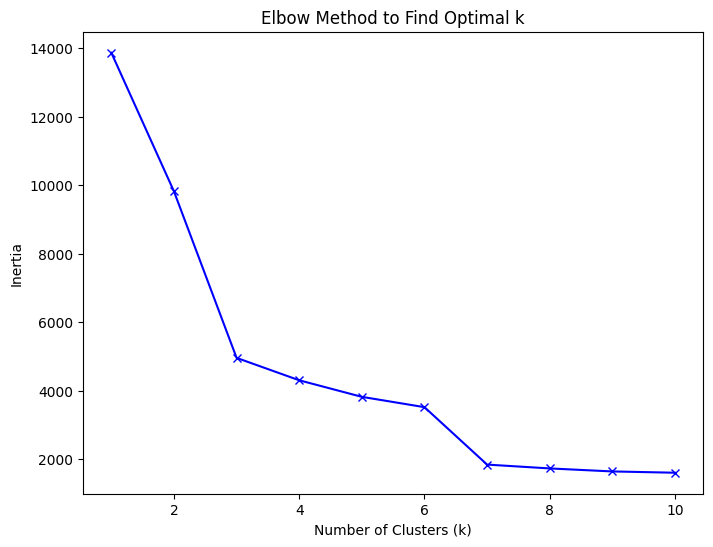

In [26]:
# Inertia values untuk setiap jumlah cluster
# Membuat daftar kosong untuk menyimpan nilai inertia (WCSS) dari setiap model KMeans dengan jumlah cluster berbeda
inertia_values = []
# Mendefinisikan rentang jumlah cluster yang akan diuji (dalam hal ini 1 hingga 10 cluster)
K_range = range(1, 11)

# Menghitung inertia untuk setiap jumlah cluster
# Melakukan iterasi untuk setiap nilai k di K_range
for k in K_range:
    # Membuat model KMeans dengan jumlah cluster k dan random_state untuk konsistensi hasil
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Melakukan fitting model KMeans pada data X
    kmeans.fit(X)
    # Menyimpan nilai inertia (WCSS) dari model ke dalam inertia_values
    inertia_values.append(kmeans.inertia_)

# Plot Inertia (Elbow Curve)
# Membuat grafik untuk menunjukkan nilai inertia berdasarkan jumlah cluster
plt.figure(figsize=(8, 6))  # Mengatur ukuran plot
# Membuat plot inertia dengan titik dan garis, untuk visualisasi Elbow Curve
plt.plot(K_range, inertia_values, 'bx-')
# Menambahkan label untuk sumbu x (Jumlah cluster)
plt.xlabel('Number of Clusters (k)')
# Menambahkan label untuk sumbu y (Inertia)
plt.ylabel('Inertia')
# Menambahkan judul grafik untuk memberikan konteks bahwa ini adalah Elbow Method
plt.title('Elbow Method to Find Optimal k')
# Menampilkan plot
plt.show()


## **#Menghitung dan Menampilkan Silhouette Score**

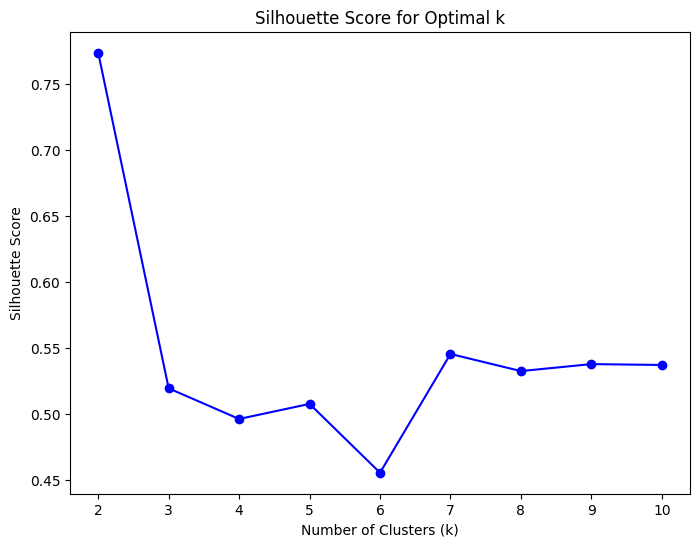

In [27]:
# Silhouette scores untuk setiap jumlah cluster
# Membuat daftar kosong untuk menyimpan nilai Silhouette Score dari setiap model KMeans dengan jumlah cluster berbeda
silhouette_scores = []

# Menghitung Silhouette Score untuk setiap jumlah cluster
# Mulai iterasi dari 2 cluster hingga 10, karena Silhouette Score tidak dapat dihitung untuk 1 cluster
for k in range(2, 11):
    # Membuat model KMeans dengan jumlah cluster k dan random_state untuk konsistensi hasil
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Melakukan fitting dan prediksi cluster pada data X, menghasilkan label cluster
    labels = kmeans.fit_predict(X)
    # Menghitung nilai rata-rata Silhouette Score untuk clustering hasil model
    silhouette_avg = silhouette_score(X, labels)
    # Menyimpan nilai Silhouette Score ke dalam daftar silhouette_scores
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
# Membuat grafik untuk menunjukkan Silhouette Score berdasarkan jumlah cluster
plt.figure(figsize=(8, 6))  # Mengatur ukuran plot
# Membuat plot Silhouette Score dengan titik dan garis, untuk visualisasi skor pada setiap k
plt.plot(range(2, 11), silhouette_scores, 'bo-')
# Menambahkan label untuk sumbu x (Jumlah cluster)
plt.xlabel('Number of Clusters (k)')
# Menambahkan label untuk sumbu y (Silhouette Score)
plt.ylabel('Silhouette Score')
# Menambahkan judul grafik untuk memberikan konteks bahwa ini adalah visualisasi Silhouette Score
plt.title('Silhouette Score for Optimal k')
# Menampilkan plot
plt.show()


## **#Visualisasi Clustering**

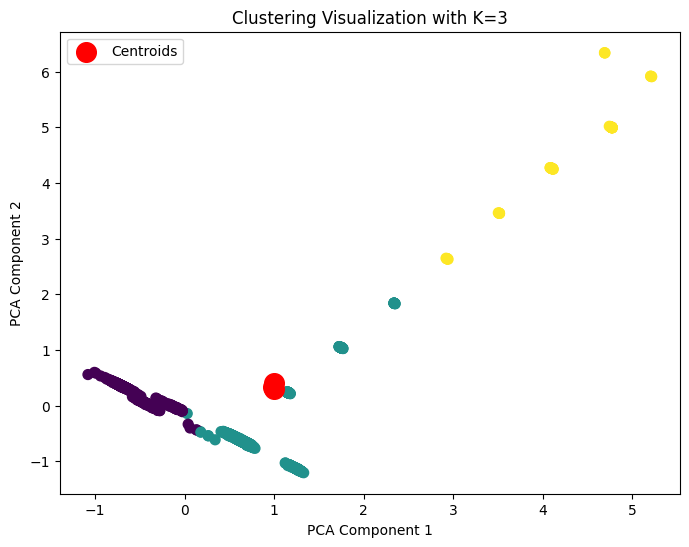

In [29]:
from sklearn.decomposition import PCA

# Lakukan PCA untuk mengurangi data ke 2D
# Membuat objek PCA dengan komponen utama sebanyak 2, untuk mereduksi data menjadi 2 dimensi (2D)
pca = PCA(n_components=2)
# Menerapkan PCA pada data X dan menyimpan hasil transformasi dalam X_pca
X_pca = pca.fit_transform(X)

# Menentukan jumlah cluster optimal berdasarkan Elbow atau Silhouette
# Jumlah cluster optimal ditetapkan sebagai 3 berdasarkan hasil Elbow atau Silhouette
optimal_k = 3  # Misalnya hasil optimal dari Elbow/Silhouette adalah 3

# Jalankan KMeans dengan jumlah cluster optimal
# Membuat model KMeans dengan jumlah cluster optimal (3) dan random_state untuk konsistensi
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
# Melakukan fitting dan prediksi cluster pada data asli X untuk mendapatkan label cluster
labels_optimal = kmeans_optimal.fit_predict(X)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))  # Mengatur ukuran plot
# Membuat scatter plot dari data tereduksi X_pca dengan warna sesuai label cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_optimal, cmap='viridis', s=50)
# Membuat scatter plot untuk centroid cluster dengan ukuran dan warna berbeda (merah)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
# Menambahkan label untuk sumbu x
plt.xlabel('PCA Component 1')
# Menambahkan label untuk sumbu y
plt.ylabel('PCA Component 2')
# Menambahkan judul untuk memberikan konteks bahwa ini adalah visualisasi clustering dengan jumlah cluster optimal
plt.title(f'Clustering Visualization with K={optimal_k}')
# Menambahkan legenda untuk mengidentifikasi centroid cluster
plt.legend()
# Menampilkan plot
plt.show()


## Kesimpulan: Model **KMeans** menjadi pilihan terbaik jika Elbow Method dan Silhouette Score konsisten dalam menunjukkan jumlah cluster optimal, sementara **DBSCAN** lebih baik untuk data dengan noise atau bentuk cluster yang tidak beraturan.